# AI Internship Challenge – Text Classification
# Author: Delfine Hasani



In [1]:
# I. Data Wrangling (Preparing the Data)

# Data Acquisition


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Load dataset
import pandas as pd

#Because the dataset I used was split in two files; train and test, I merged them into one single csv for later use

# Load train and test, skip the first row (which contains text headers)
train_df = pd.read_csv("train.csv", header=None, skiprows=1)
test_df = pd.read_csv("test.csv", header=None, skiprows=1)

# Add column names
train_df.columns = ["label", "title", "description"]
test_df.columns = ["label", "title", "description"]

# Merge them
df = pd.concat([train_df, test_df], ignore_index=True)

# Save as single CSV
df.to_csv("ag_news_full.csv", index=False)

print("Saved merged dataset as ag_news_full.csv with shape:", df.shape)


Saved merged dataset as ag_news_full.csv with shape: (127600, 3)


In [23]:
df = pd.read_csv("ag_news_full.csv")
# I picked AG News because it has multiple categories and enough samples for training.

In [24]:
# Inspect the data
print(df.head()) # shows the first 5 rows of the dataframe
print(df.info()) # shows the number of rows and column, column names, data types, non-null values...
print(df.describe()) #statistics: count, mean, min, max, quartiles ...

   label                                              title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127600 entries, 0 to 127599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   label        127600 non-null  int64 
 1   title        127600 non-null  object
 2   descript

In [25]:
# Data Cleaning / Preprocessing


def clean_text(text):
    text = text.lower() # lowercase all text
    text = re.sub(r"[^a-z\s]", "", text)  # remove punctuation/numbers
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

 # Create a new text column by merging title + description
df['text'] = df['title'] + " " + df['description']

# Now clean it
df['clean_text'] = df['text'].apply(clean_text)
   


# II. # Exploratory Data Analysis (EDA)

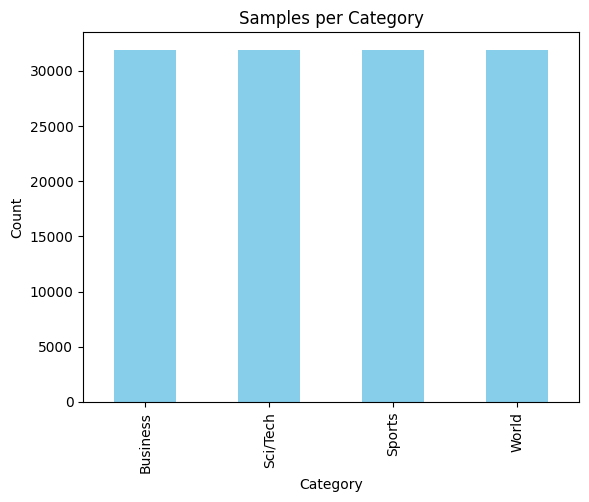

In [26]:
# Distribution of categories

# Ensure labels are integers
df["label"] = df["label"].astype(int)

# Map numeric labels to names
label_map = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
df["category"] = df["label"].map(label_map)

# Plot again
df["category"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Samples per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()



In [ ]:
# Feature Engineering (TF-IDF)

vectorizer = TfidfVectorizer(max_features=5000, 
ngram_range(1,2),  # include unigrams + bigrams
stop_words='english') # remove common words

X = vectorizer.fit_transform(df['clean_text'])

y = df['label'] 


In [ ]:
# Splitting the data into train-test
# 80% of the data for training and the remaining 20% for testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
# Model Training (Naive Bayes vs Logistic Regression)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


In [30]:
# Model Evaluation

print("Naive Bayes Performance:\n")
print(classification_report(y_test, nb_preds))

print("Logistic Regression Performance:\n")
print(classification_report(y_test, lr_preds))


Naive Bayes Performance:

              precision    recall  f1-score   support

           1       0.90      0.88      0.89      6283
           2       0.94      0.98      0.96      6466
           3       0.86      0.85      0.86      6370
           4       0.87      0.86      0.87      6401

    accuracy                           0.89     25520
   macro avg       0.89      0.89      0.89     25520
weighted avg       0.89      0.89      0.89     25520

Logistic Regression Performance:

              precision    recall  f1-score   support

           1       0.92      0.89      0.90      6283
           2       0.95      0.98      0.96      6466
           3       0.87      0.88      0.88      6370
           4       0.88      0.88      0.88      6401

    accuracy                           0.91     25520
   macro avg       0.91      0.91      0.91     25520
weighted avg       0.91      0.91      0.91     25520



In [ ]:
# Observations:
# - Both models perform well, but Logistic Regression outperforms Naive Bayes overall with ~91% accuracy compared to ~89% for Naive Bayes.
# - Category 2 (Sports) has the highest recall in both models (~98%), meaning the classifier almost never misses sports-related news.
# - Categories 3 (Business) and 4 (Sci/Tech) are slightly harder for the models, with lower precision/recall compared to World and Sports.
# - Logistic Regression seems more balanced across all categories, while Naive Bayes struggles more with Business and Sci/Tech.
# - Given the dataset is fairly balanced, accuracy and macro F1-scores are reliable metrics.
# - Final choice: Logistic Regression is the better model here due to higher and more consistent scores across classes.


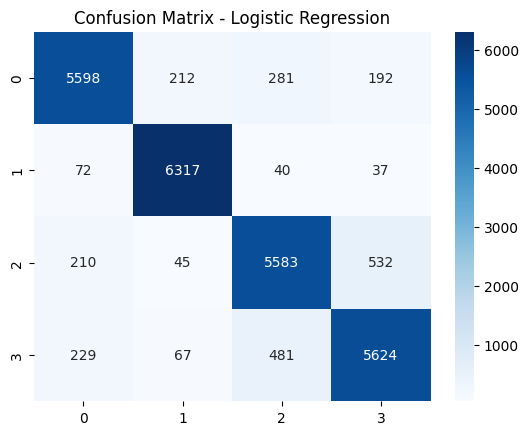

In [31]:
# Confusion Matrix (for one model):

cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
# Looking at the confusion matrix:
# - Most predictions are correct (dark diagonal).
# - Sports is super clean, barely any mistakes.
# - The tricky part is Business vs Sci/Tech – the model mixes those up quite a bit, which actually makes sense because news about "tech companies" overlaps.
# - World news is also solid, just a few slips into Business.
# - Overall, the model is doing a good job, with most errors happening where you'd expect.


In [36]:
# Prediction Script

label_map = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}

def predict_category(text, model=lr_model):
    clean = clean_text(text)
    vec = vectorizer.transform([clean])
    pred_label = model.predict(vec)[0]
    return label_map[pred_label]   # return category name instead of number

# Example predictions
print(predict_category("Cristiano Ronaldo signed with F.C.Barcelona"))
print(predict_category("Apple releases new Iphone 17 with outstanding features"))


Sports
Sci/Tech


In [38]:
import joblib
joblib.dump(lr_model, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']